In [1]:
import earthkit

In [2]:
YEARS = {
    1993: "Normal conditions",
    1997: "El Niño",
    1998: "La Niña",
}

In [3]:
data = earthkit.data.from_source(
    "cds", "reanalysis-era5-single-levels-monthly-means",
    {
        "product_type": "monthly_averaged_reanalysis",
        "variable": "sea_surface_temperature",
        "year": list(YEARS),
        "month": "12",
        "day": "01",
        "time": "00:00",
        "area": [20, 100, -20, -60],
        "grid": [0.25, 0.25],
    },
)

In [4]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,sst,surface,0,19931201,0,0,an,0,regular_ll
1,ecmf,sst,surface,0,19971201,0,0,an,0,regular_ll
2,ecmf,sst,surface,0,19981201,0,0,an,0,regular_ll


In [5]:
style = earthkit.maps.styles.Style(colors="Spectral_r", levels=range(15, 33))

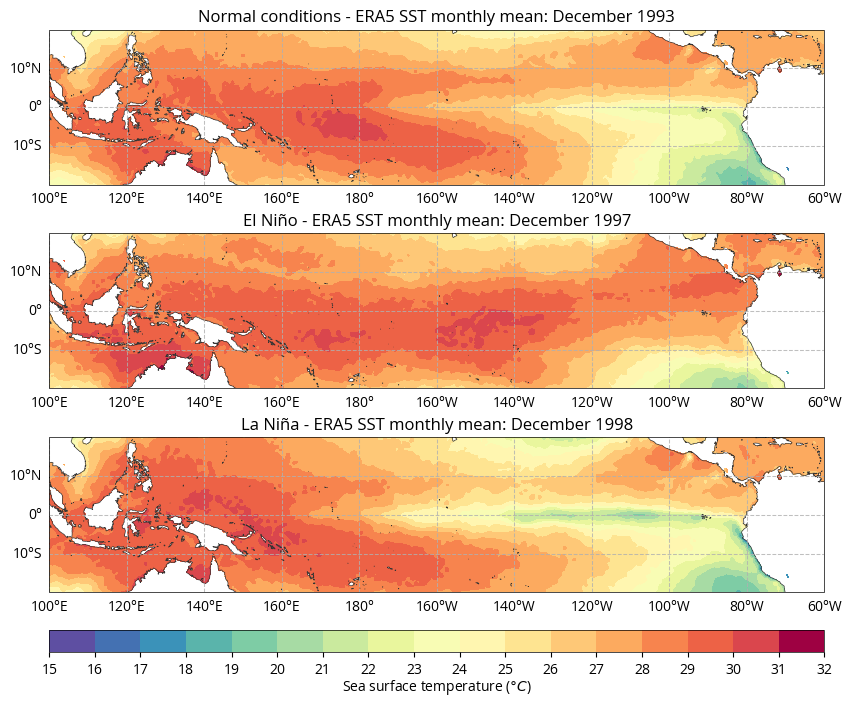

In [6]:
chart = earthkit.maps.Chart(domain=[100, 300, -20, 20], rows=3)

chart.shaded_contour(data, style=style, units="celsius")
chart.coastlines()
chart.gridlines(xlocs=range(-180, 180, 20), ylocs=range(-20, 20, 10))
chart.legend(location="bottom", ticks=style.levels)

for subplot, conditions in zip(chart.subplots, YEARS.values()):
    subplot.title(f"{conditions} - ERA5 SST monthly mean: {{time:%B %Y}}")

chart.show()